In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data import

In [2]:
# import data - already aggregated hourly
names=['index','time','political','state','num_tot_tweets','num_tot_retweets',
       'bias_sanctity', 'bias_fairness', 'bias_authority','bias_loyalty', 'bias_care',
       'intensity_sanctity', 'intensity_fairness','intensity_authority', 'intensity_loyalty', 'intensity_care',
       'vice_sanctity', 'virtue_sanctity', 'vice_fairness', 'virtue_fairness',
       'vice_authority', 'virtue_authority', 'vice_loyalty', 'virtue_loyalty','vice_care', 'virtue_care',
       'anger','anticipation','disgust','fear','joy','love','optimism','pessimism','sadness','surprise','trust']

df = pd.read_csv('agg_covid_tweets_states.csv',names=names,lineterminator='\n')
df = df.drop_duplicates()
df = df.drop(0,axis=0)

/Users/fionaguo/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# during aggregation, some dates index is included, some dates it's not, normalize the data
tmp = df[df['trust'].isnull()]
tmp.drop('trust',axis=1,inplace=True)

names.remove('index')
tmp.columns = names

df = df[~df['trust'].isnull()]
df.drop('index',axis=1,inplace=True)

df = pd.concat([df,tmp],axis=0)

df = df[~df.anticipation.isnull()]

df.time = pd.to_datetime(df.time)

# set time frame to 01/24 to 05/01
df = df[(df.time >= pd.Timestamp('2020-01-24')) & (df.time < pd.Timestamp('2020-05-01'))]

df = df.set_index(['time','political','state'])
df = df.astype(float)

df = df.sort_index(level=0)

df = df.reset_index()

df

/Users/fionaguo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,time,political,state,num_tot_tweets,num_tot_retweets,bias_sanctity,bias_fairness,bias_authority,bias_loyalty,bias_care,...,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2020-01-24 00:00:00,-1.0,AK,8.0,6.0,-0.115558,-0.085331,-0.093436,-0.090459,-0.107172,...,0.000000,0.125000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2020-01-24 00:00:00,-1.0,AL,17.0,13.0,-0.079721,0.001060,-0.028805,-0.039228,-0.007037,...,0.000000,0.117647,0.176471,0.000000,0.000000,0.235294,0.000000,0.000000,0.000000,0.000000
2,2020-01-24 00:00:00,-1.0,AR,5.0,3.0,-0.030927,0.035619,-0.017028,-0.016343,0.042674,...,0.200000,0.200000,0.200000,0.200000,0.000000,0.200000,0.000000,0.200000,0.000000,0.000000
3,2020-01-24 00:00:00,-1.0,AZ,22.0,20.0,-0.061938,-0.052352,-0.045468,-0.042103,-0.067456,...,0.045455,0.318182,0.363636,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000
4,2020-01-24 00:00:00,-1.0,CA,235.0,178.0,-0.071316,-0.046673,-0.052038,-0.050194,-0.056694,...,0.072340,0.302128,0.212766,0.038298,0.004255,0.029787,0.008511,0.097872,0.008511,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242927,2020-04-30 23:00:00,moderacy1,all,1929.0,1091.0,-0.000872,0.020250,0.002298,0.010440,0.029954,...,0.058580,0.348367,0.053914,0.161742,0.008294,0.111457,0.004666,0.089684,0.011923,0.002592
242928,2020-04-30 23:00:00,political-1,all,1833.0,1034.0,-0.000136,0.021395,0.002642,0.011030,0.031117,...,0.054010,0.352973,0.053464,0.162029,0.009274,0.110202,0.004364,0.090016,0.009820,0.002728
242929,2020-04-30 23:00:00,political1,all,919.0,546.0,-0.007291,-0.000457,0.000511,0.004389,0.013149,...,0.046790,0.365615,0.058760,0.150163,0.011970,0.100109,0.007617,0.076170,0.023939,0.002176
242930,2020-04-30 23:00:00,science-1,all,888.0,540.0,-0.007374,-0.000198,0.000472,0.004071,0.013349,...,0.045045,0.365991,0.059685,0.141892,0.010135,0.097973,0.007883,0.074324,0.025901,0.002252


In [7]:
# just looking at different political ideologies, ignore different states for now
df = df[(df.state=='all') & (df.political!='all')]

In [9]:
# calculate daily aggregation - less noise on the figure
var_names = ['bias_sanctity', 'bias_fairness', 'bias_authority','bias_loyalty', 'bias_care',
       'intensity_sanctity', 'intensity_fairness','intensity_authority', 'intensity_loyalty', 'intensity_care',
       'vice_sanctity', 'virtue_sanctity', 'vice_fairness', 'virtue_fairness',
       'vice_authority', 'virtue_authority', 'vice_loyalty', 'virtue_loyalty','vice_care', 'virtue_care',
       'anger','anticipation','disgust','fear','joy','love','optimism','pessimism','sadness','surprise','trust']

df_daily = df.copy(deep=True)

for var in var_names:
    df_daily[var] = df_daily[var]*df_daily['num_tot_tweets']
    
df_daily['date'] = df_daily.time.dt.date

df_daily = df_daily.groupby(['date','political'])[['num_tot_tweets']+var_names].sum()

for var in var_names:
    df_daily[var] = df_daily[var]/df_daily['num_tot_tweets']
    
df_daily.reset_index(inplace=True)

# conservatives vs liberals

In [12]:
groups = {}
for group in df_daily.groupby(['political']):
    print(group[0])
    sub_df = group[1]
    sub_df.set_index('date',inplace=True)
    groups[group[0]] = sub_df


moderacy-1
moderacy1
political-1
political1
science-1
science1


In [13]:
mf_cols = ['bias_sanctity', 'bias_fairness', 'bias_authority','bias_loyalty', 'bias_care',
       'intensity_sanctity', 'intensity_fairness','intensity_authority', 'intensity_loyalty', 'intensity_care',
       'vice_sanctity', 'virtue_sanctity', 'vice_fairness', 'virtue_fairness',
       'vice_authority', 'virtue_authority', 'vice_loyalty', 'virtue_loyalty','vice_care', 'virtue_care']
emot_cols = ['anger','anticipation','disgust','fear','joy','love','optimism','pessimism','sadness','surprise','trust']

## emotions

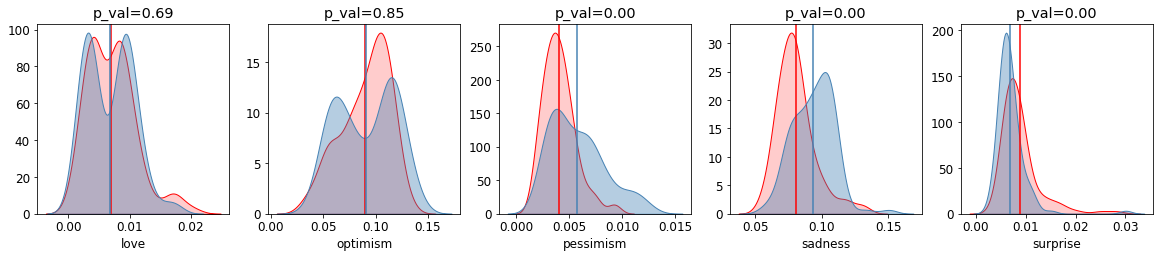

In [16]:
import scipy.stats as stats
# plot emotion distributions of conserv. and libearl
emot_colnames = ['love','optimism','pessimism','sadness','surprise','trust']
#emot_colnames = ['anger','anticipation','disgust','fear','joy']

# political
plt.rcParams.update({'font.size': 12})
fig,axs = plt.subplots(1,5,figsize=[20,3.5])
for c,i in zip(emot_colnames,range(5)):
    sns.kdeplot(groups['political1'][c],label='conservative',alpha=0.2,color='red',ax=axs[i],fill=True)
    sns.kdeplot(groups['political-1'][c],label='liberal',alpha=0.4,color='steelblue',ax=axs[i],fill=True)
    axs[i].axvline(groups['political1'][c].mean(),color='red')
    axs[i].axvline(groups['political-1'][c].mean(),color='steelblue')
    # axs[i].legend()
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    # t-test
    tstats = stats.ttest_ind(groups['political1'][c], groups['political-1'][c])[1]
    axs[i].set_title('p_val=%.2f' % tstats)
    # k-s test Kolmogorov-Smirnov test
#     from scipy.stats import kstest
#     ksstats = kstest(groups['political1'][c], groups['political-1'][c])[1]

for (i, cell),a in zip(enumerate(axs),emot_colnames):
    cell.set_xlabel(a)
plt.show()
#plt.savefig('MF_causal_covid_tweets_figs/histograms_compare_left_right.png')


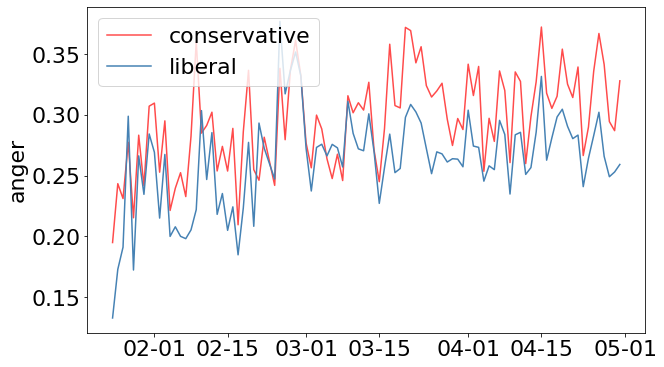

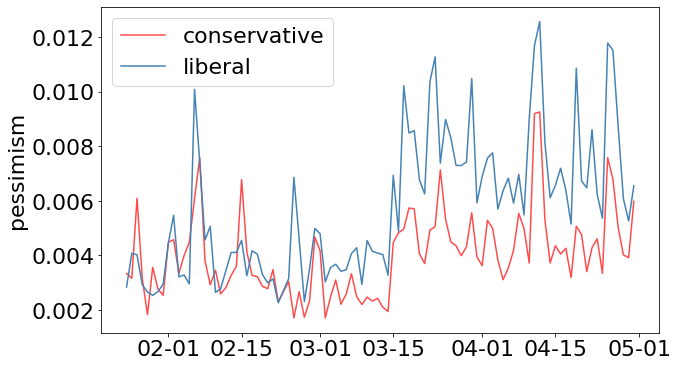

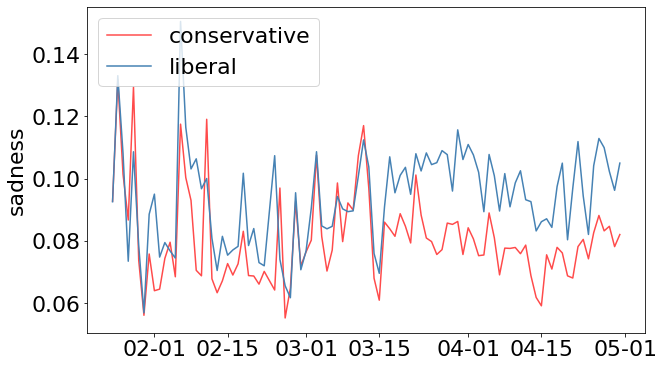

In [23]:
# how different groups' emotions change over time
plt.rcParams.update({'font.size': 22})
for c in ['anger','pessimism','sadness']:
    fig,ax = plt.subplots(figsize=[10,6])
    plt.plot(groups['political1'].loc[(groups['political1'].index>=pd.Timestamp('2020-01-24')) & (groups['political1'].index<=pd.Timestamp('2020-05-01')),c],label='conservative',color='red',alpha=0.7)
    plt.plot(groups['political-1'].loc[(groups['political1'].index>=pd.Timestamp('2020-01-24')) & (groups['political1'].index<=pd.Timestamp('2020-05-01')),c],label='liberal',color='steelblue')
    plt.legend(loc='upper left')
    # plt.title(c)
    from matplotlib.dates import DateFormatter
    date_form = DateFormatter("%m-%d")
    ax.xaxis.set_major_formatter(date_form)
    plt.ylabel(c)
    # plt.ylim((0,0.018))
    ax.patch.set_alpha(0)
    plt.show()

# moral foundations

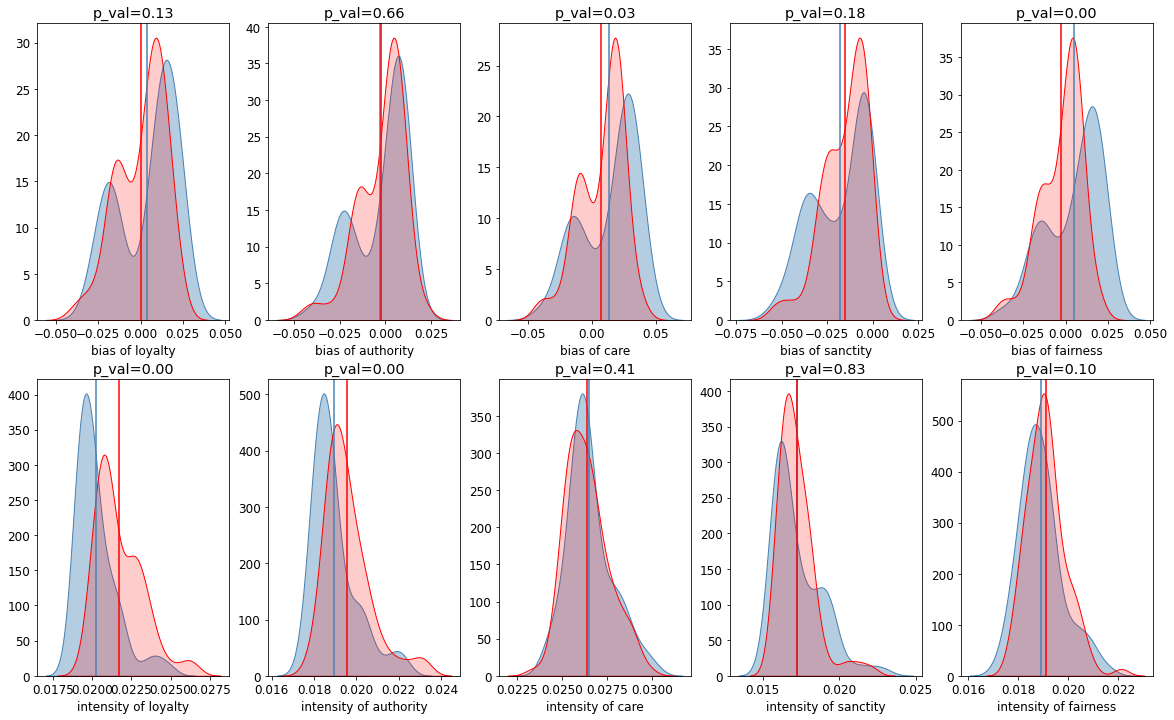

In [20]:
plt.rcParams.update({'font.size': 12})
fig,axs = plt.subplots(2,5,figsize=[20,12])
for c,i in zip(['loyalty','authority','care','sanctity','fairness'],range(5)):
    for a,j in zip(['bias','intensity'],range(2)):
        sns.kdeplot(groups['political-1'][a+'_'+c],label='liberal',alpha=0.4,color='steelblue',ax=axs[j,i],fill=True,)
        sns.kdeplot(groups['political1'][a+'_'+c],label='conservative',alpha=0.2,color='red',ax=axs[j,i],fill=True)
        # axs[j,i].hist(groups['political-1'][a+'_'+c],label='liberal',alpha=0.4,color='steelblue')
        axs[j,i].axvline(groups['political-1'][a+'_'+c].mean(),color='steelblue')
        axs[j,i].axvline(groups['political1'][a+'_'+c].mean(),color='red')
        axs[j,i].set_xlabel(a+' of '+c)
        axs[j,i].set_ylabel('')
        
        # axs[j,i].legend()
        # difference in means
        del_mean = (groups['political-1'][a+'_'+c].mean() - groups['political1'][a+'_'+c].mean())/groups['political1'][a+'_'+c].mean()
        # t-test
        tstats = stats.ttest_ind(groups['political1'][a+'_'+c], groups['political-1'][a+'_'+c])[1]
        axs[j,i].set_title('p_val=%.2f' % tstats)

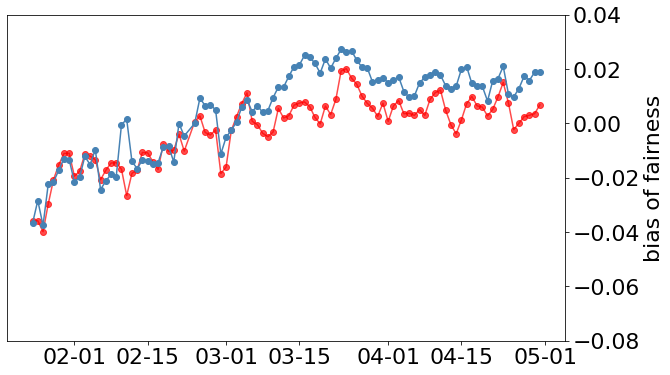

In [25]:
import scipy.stats as stats


plt.rcParams.update({'font.size': 22})
for c in ['fairness']:
    for a in ['bias']:
        fig,ax = plt.subplots(figsize=[10,6])
        tmp_r = groups['political1'].loc[(groups['political1'].index>=pd.Timestamp('2020-01-24')) & (groups['political1'].index<=pd.Timestamp('2020-05-01')),a+'_'+c]
        tmp_l = groups['political-1'].loc[(groups['political-1'].index>=pd.Timestamp('2020-01-24')) & (groups['political-1'].index<=pd.Timestamp('2020-05-01')),a+'_'+c]
        
        plt.plot(tmp_r,label='conservative',color='red',alpha=0.7,marker='o')
        plt.plot(tmp_l,label='liberal',color='steelblue',marker='o')
        #plt.legend()
        #plt.title(a+'_'+c)
        from matplotlib.dates import DateFormatter
        date_form = DateFormatter("%m-%d")
        ax.xaxis.set_major_formatter(date_form)
        ax.yaxis.tick_right()
        plt.ylabel('bias of fairness')
        ax.yaxis.set_label_position("right")
        ax.patch.set_alpha(0)
        plt.ylim((-0.08,0.04))
        plt.show()